### ДЗ Корреляция и корреляционный анализ
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и
средней годовой смертностью?
a. Построить точечный график
b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
c. Построить модель линейной регрессии
d. Рассчитать коэффициент детерминации
e. Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов
по отдельности?
a. Разделить данные на 2 группы
b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [159]:
df = pd.read_csv('Correlations_and_Rergressions\water.csv', index_col=None)
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [160]:
df = df[['location', 'town', 'mortality', 'hardness']]
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [161]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


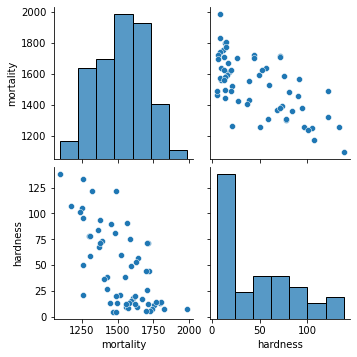

In [162]:
sns.pairplot(df)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

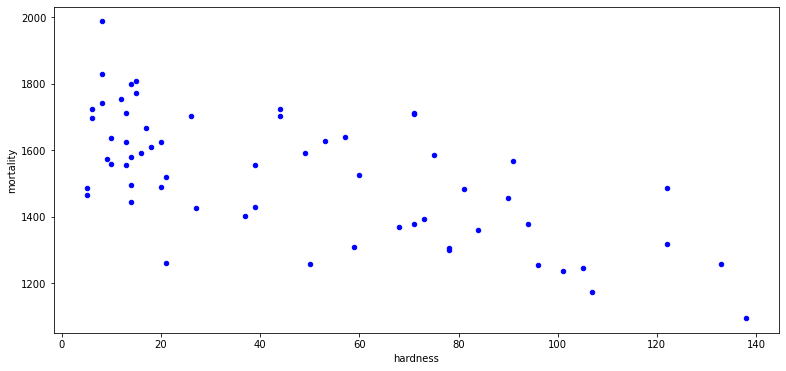

In [163]:
df.plot.scatter(x='hardness', y='mortality', c= 'blue')

***Данные показывают, что в районах с более мягкой водой зафиксировно большее количество смертей***

In [164]:
# коэффециент Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [165]:
# коэффециент Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [166]:
# коэффециент Кендалла
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [167]:
#Модель линейной регрессии

In [168]:
X = df[['hardness']]
y = df['mortality']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [170]:
#X_train.shape
X_test.shape

(16, 1)

In [171]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [172]:
# y = ax + b, коэффициент "а", показывает как изменится смертность при изменении жесткости воды
model.coef_

array([-3.31576799])

In [173]:
# y = ax + b, коэффициент "b"
model.intercept_

1678.9405326885008

In [174]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [175]:
# коэффициент детерминации
model.score(X_test, y_test) 

0.410213439338294

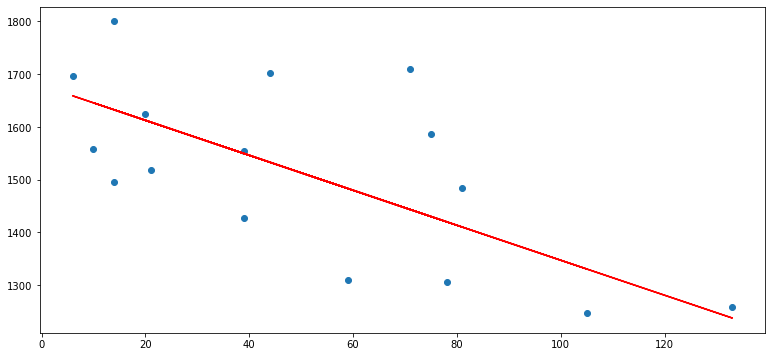

In [176]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [177]:
#Средняя абсолютная ошибка
np.mean(np.abs(y_test - y_pred))

107.35590681425938

In [178]:
#Дисперсия абсолютной ошибки
np.var(np.abs(y_test - y_pred))

4663.021038636644

In [179]:
#Дисперсия ошибки
np.var((y_test - y_pred))

16148.930038273811

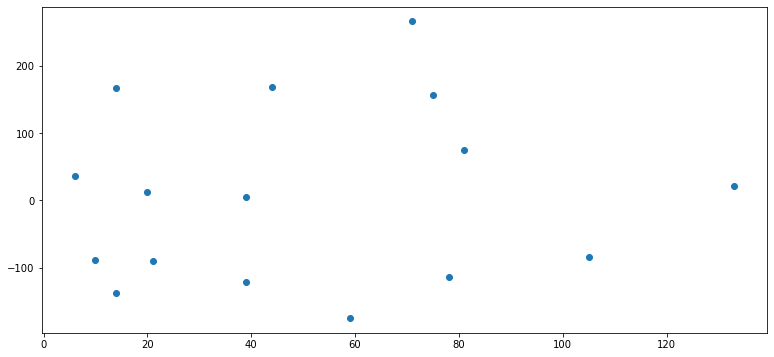

In [180]:
#Визуализируем остатки
plt.scatter(X_test, (y_test - y_pred))

***Взаимосвязи в остатках не видно, что может свидетельствовать о том, что модель хорошая.***

### Разделим датасет

In [181]:
df_north = df[df['location'] == 'North']
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [182]:
df_south = df[df['location'] == 'South']
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


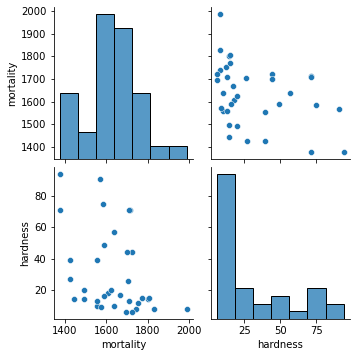

In [183]:
sns.pairplot(df_north)

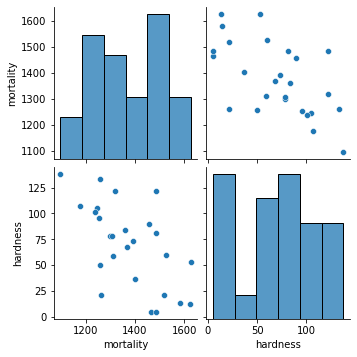

In [184]:
sns.pairplot(df_south)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

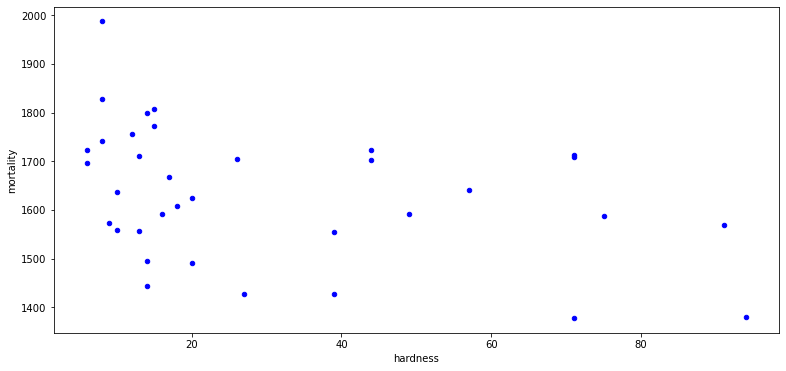

In [235]:
df_north.plot.scatter(x='hardness', y='mortality', c= 'blue')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

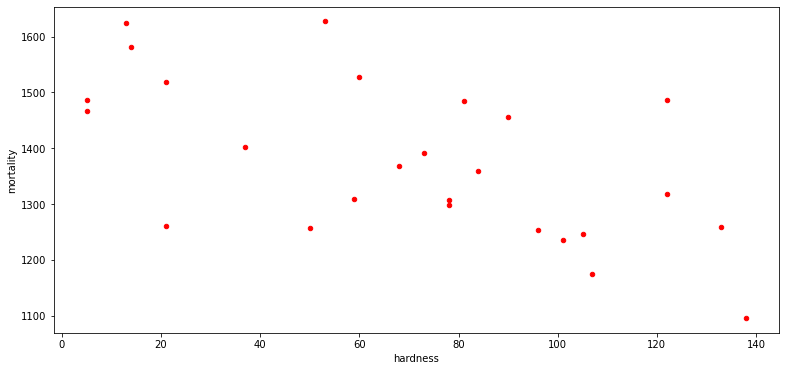

In [223]:
df_south.plot.scatter(x='hardness', y='mortality', c= 'red')

***При разделении датасета на север и юг, прослеживается тенденция, что повышенная смертность в целом олее свойственна северному региону, в том числе при мягкой воде***

### NORTH

In [236]:
# коэффециент Пирсона
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [237]:
# коэффециент Спирмена
df_north[['mortality', 'hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [238]:
# коэффециент Кендaлла
df_north[['mortality', 'hardness']].corr('kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [239]:
Xn = df_north[['hardness']]
yn = df_north['mortality']

In [240]:
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(Xn, yn, test_size=0.25, random_state=42)

In [241]:
model_n = LinearRegression()
model_n.fit(X_train_north, y_train_north)

LinearRegression()

In [242]:
model_n.coef_

array([-2.14659196])

In [243]:
model_n.intercept_

1691.0175604303595

In [244]:
y_pred_north = model_n.predict(X_test_north)
y_pred_north

array([1673.84482478, 1671.69823282, 1660.96527304, 1678.13800869,
       1656.67208912, 1538.60953151, 1596.56751434, 1673.84482478,
       1607.30047412])

In [245]:
# коэффициент детерминации
model_n.score(X_test_north, y_test_north) 

-0.09826474145023711

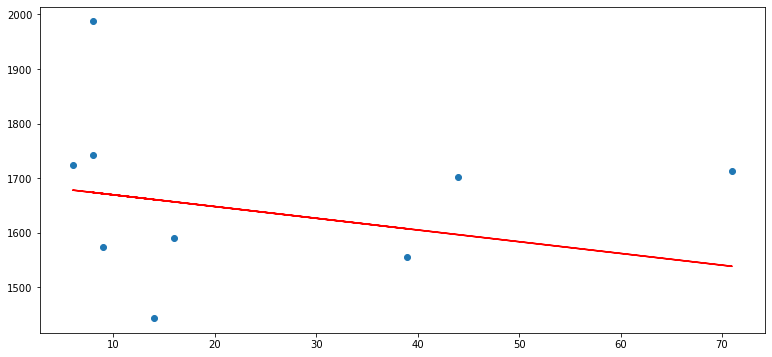

In [246]:
plt.scatter(X_test_north, y_test_north)
plt.plot(X_test_north, y_pred_north, c='r')

In [247]:
#Средняя абсолютная ошибка
np.mean(np.abs(y_test_north - y_pred_north))

126.62570722350428

In [248]:
#Дисперсия абсолютной ошибки
np.var(np.abs(y_test_north - y_pred_north))

7300.340908197542

In [249]:
#Дисперсия ошибки
np.var(y_test_north - y_pred_north)

22405.11452282838

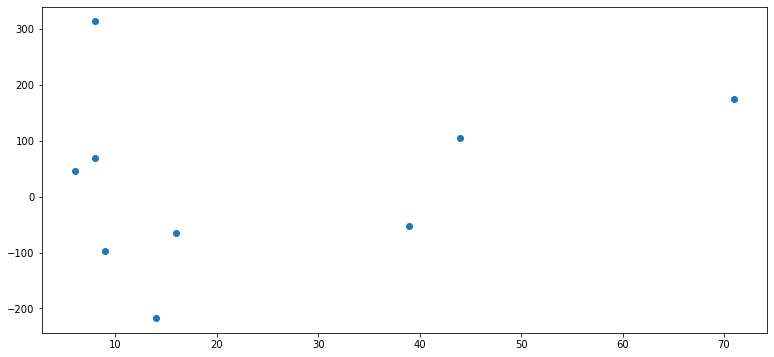

In [250]:
#Визуализируем остатки
plt.scatter(X_test_north, (y_test_north - y_pred_north))

### SOUTH

In [251]:
# коэффециент Пирсона
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [252]:
# коэффециент Спирмена
df_south[['mortality', 'hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [253]:
# коэффециент Кендaлла
df_south[['mortality', 'hardness']].corr('kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [254]:
Xs = df_south[['hardness']]
ys = df_south['mortality']

In [255]:
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(Xs, ys, test_size=0.25, random_state=42)

In [256]:
model_s = LinearRegression()
model_s.fit(X_train_south, y_train_south)

LinearRegression()

In [257]:
model_s.coef_

array([-3.12141428])

In [258]:
model_s.intercept_

1604.2662828795662

In [259]:
y_pred_south = model_s.predict(X_test_south)
y_pred_south

array([1223.45374102, 1588.65921149, 1276.51778374, 1223.45374102,
       1488.77395461, 1538.71658305, 1420.10284051])

In [260]:
# коэффициент детерминации
model_s.score(X_test_south, y_test_south) 

-2.0816097873391914

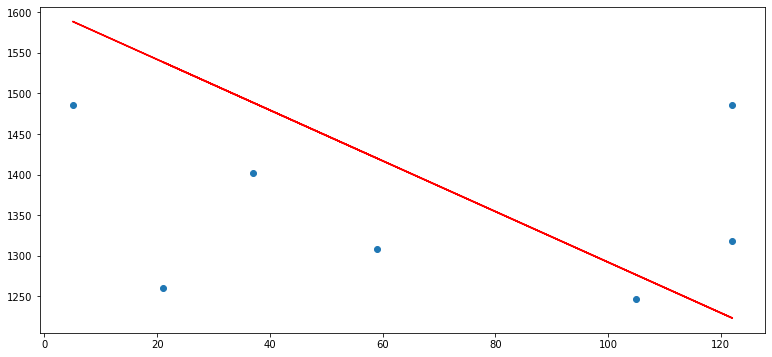

In [261]:
plt.scatter(X_test_south, y_test_south)
plt.plot(X_test_south, y_pred_south, c='r')

In [262]:
#Средняя абсолютная ошибка
np.mean(np.abs(y_test_south - y_pred_south))

137.98041305093844

In [263]:
#Дисперсия абсолютной ошибки
np.var(np.abs(y_test_south - y_pred_south))

7652.297112363375

In [264]:
#Дисперсия ошибки
np.var(y_test_south - y_pred_south)

25398.202867030293

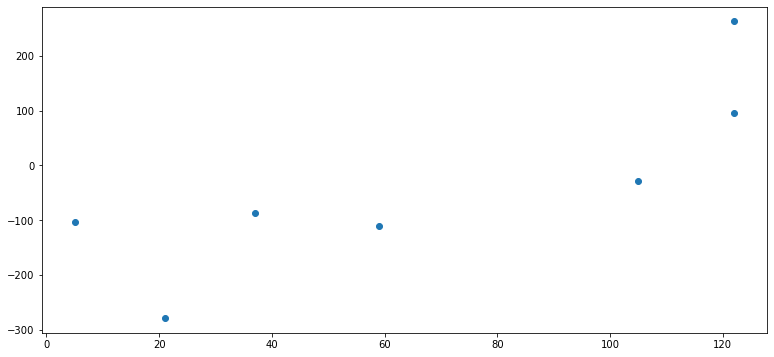

In [265]:
#Визуализируем остатки
plt.scatter(X_test_south, (y_test_south - y_pred_south))

***в целом анализ остатков свидетельсвтует о некоторой вероятной нелинейной зависимости в датасете "север" и прямой линейной зависимости в датасете "юг", но данных для построения модели очевидно мало, чтобы однозначно интерпретировать данные"***